# SPIN 1 - VL03 -- Gewöhnliche Differenzialgleichungen - ODE


In [82]:
import numpy
import matplotlib.pyplot as plt
%matplotlib inline

In [83]:
def forward_euler_step(u, f, dt):
    return u + dt * f(u)

In [84]:
def midpoint_RK2_step(u, f, dt):
    k = u + dt * 0.5 * f(u)
    return u + dt* f(k)

In [85]:
def RK4_step(u, f, dt):
    k1 = f(u)
    u1 = u + (dt/2)*k1
    k2 = f(u1)
    u2 = u + (dt/2)*k2
    k3 = f(u2)
    u3 = u + dt*k3
    k4 = f(u3)
    return u + (dt/6)*(k1 + 2*k2 + 2*k3 + k4)

In [86]:
ke = 2 #alpha
ka = 1.06 #gamma
kae = 0.01 #delta
kea = 0.02 #betta

e0 = 100
a0 = 15
t0 = 0
T = 10
dt = 0.01
N = int(T/dt)+1

def lv_adler_eichhörnchen(u):
    a = u[0]
    e = u[1]
    return numpy.array([a * (kae * e - ka), -e * (kea * a - ke )])
        

In [87]:
u_euler = numpy.empty((N, 2))
u_euler[0] = numpy.array([a0, e0])
u_mp = numpy.empty((N, 2))
u_mp[0] = numpy.array([a0, e0])
u_rk4 = numpy.empty((N, 2))
u_rk4[0] = numpy.array([a0, e0])

for n in range(N-1):
    u_euler[n+1] = forward_euler_step(u_euler[n], lv_adler_eichhörnchen, dt)
    
for n in range(N-1):
    u_mp[n+1] = midpoint_RK2_step(u_mp[n], lv_adler_eichhörnchen, dt)
    
for n in range(N-1):
    u_rk4[n+1] = RK4_step(u_rk4[n], lv_adler_eichhörnchen, dt)

In [88]:
time = numpy.linspace(0.0, T,N)
a_euler = u_euler[:,0]
e_euler = u_euler[:,1]

a_mp = u_mp[:,0]
e_mp = u_mp[:,1]

a_rk4 = u_rk4[:,0]
e_rk4 = u_rk4[:,1]

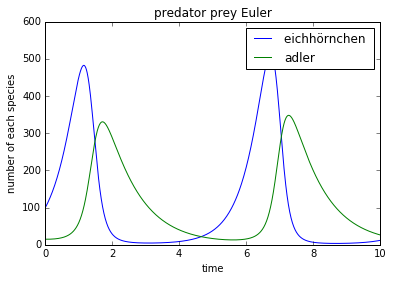

In [89]:
plt.plot(time, e_euler, label = 'eichhörnchen ')
plt.plot(time, a_euler, label = 'adler')
plt.legend(loc='upper right')
#labels
plt.xlabel("time")
plt.ylabel("number of each species")
#title
plt.title("predator prey Euler")


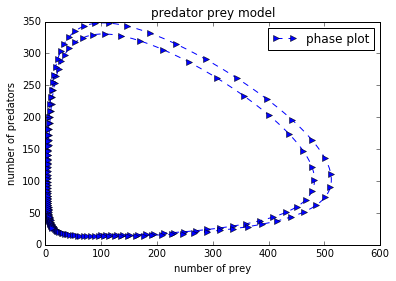

In [90]:

plt.plot(e_euler, a_euler, '-->', markevery=5, label = 'phase plot')
plt.legend(loc='upper right')
#labels
plt.xlabel("number of prey")
plt.ylabel("number of predators")
#title
plt.title("predator prey model")

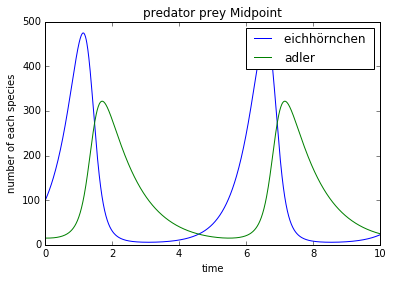

In [91]:
plt.plot(time, e_mp, label = 'eichhörnchen ')
plt.plot(time, a_mp, label = 'adler')
plt.legend(loc='upper right')
#labels
plt.xlabel("time")
plt.ylabel("number of each species")
#title
plt.title("predator prey Midpoint")


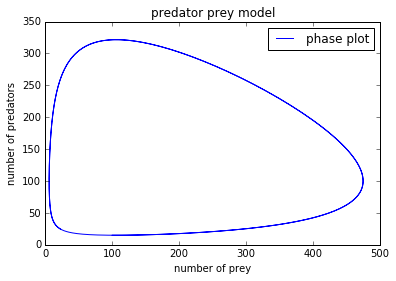

In [92]:

plt.plot(e_mp, a_mp, '-', markevery=5, label = 'phase plot')
plt.legend(loc='upper right')
#labels
plt.xlabel("number of prey")
plt.ylabel("number of predators")
#title
plt.title("predator prey model")

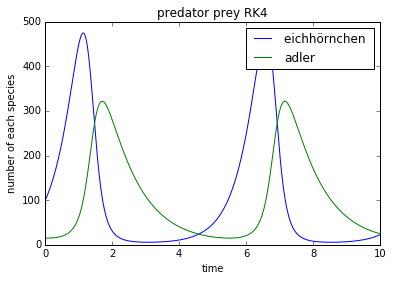

In [93]:
plt.plot(time, e_rk4, label = 'eichhörnchen ')
plt.plot(time, a_rk4, label = 'adler')
plt.legend(loc='upper right')
#labels
plt.xlabel("time")
plt.ylabel("number of each species")
#title
plt.title("predator prey RK4")


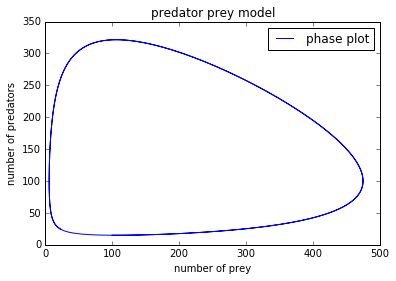

In [94]:
plt.plot(e_rk4, a_rk4, '-', markevery=5, label = 'phase plot')
plt.legend(loc='upper right')
#labels
plt.xlabel("number of prey")
plt.ylabel("number of predators")
#title
plt.title("predator prey model")

## Fixed Point
Der nicht-triviale Fixpunkt ergibt sich durch Optimierung einer Bewegungskonstanten $V$, oder equivalent $K=exp(V)$ :

$K = y^\alpha e^{-\beta y} \, x^\gamma e^{-\delta x}$ 

also:

 $y^\alpha e^{-\beta y} \, x^\gamma e^{-\delta x}=\frac{y^\alpha x^\gamma}{e^{\delta x+\beta y}}\longrightarrow \max\limits_{x,y>0}$

dies führt zu einem Fixpunkt
$\left(\frac{\gamma}{\delta},\frac{\alpha}{\beta}\right)$ oder in unserem fall 

$\left(\frac{K_a}{K_{ae}},\frac{K_e}{K_{ea}}\right)$

(WIKIPEDIA)

Fixed Point at: (100 , 106)


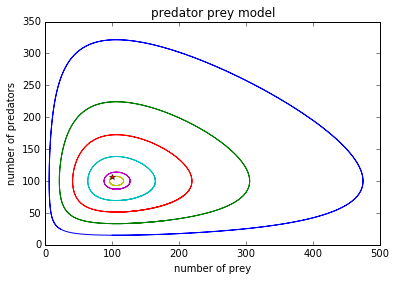

In [95]:
a0 = numpy.linspace(15,106, 6)
e0 = [100]*6

res = []
for s in range(0,len(a0)):

    u_rk4 = numpy.empty((N, 2))
    u_rk4[0] = numpy.array([a0[s], e0[s]])

    for n in range(N-1):
        u_rk4[n+1] = RK4_step(u_rk4[n], lv_adler_eichhörnchen, dt)
    res.append(u_rk4)


for r in res:
    a_rk4 = r[:,0]
    e_rk4 = r[:,1]

    plt.plot(e_rk4, a_rk4, '-')
plt.plot((ke/kea),(ka/kae), '*',color = 'r')

#labels
plt.xlabel("number of prey")
plt.ylabel("number of predators")
#title
plt.title("predator prey model")

print("Fixed Point at: (%d , %d)" %((ke/kea), (ka/kae) ))